In [2]:
from pathlib import Path 
import pandas as pd
import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
from feature_creation import (
    config, 
    csv_preprocess, 
    make_windowed_features,
    read_hdf,
    update_hdf
)

In [3]:
dfraw = read_hdf()

In [20]:
Xy = pd.DataFrame()
for name, training_set in tqdm.tqdm(dfraw.groupby('name')):
    y = training_set['y'].iloc[0]
    xy = make_windowed_features(training_set)
    xy['y'] = y
    Xy = pd.concat([Xy, xy], ignore_index=True)

100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


In [22]:
# 7th more importante features -> gives ~93% accuracy in average
selected_features = ['ack_entropy', 'ttl_entropy', 'tcp_ack_var', 'pkt_entropy', 
                     'udp_nports', 'dw_ttl_avg', 'dw_ttl_unique']

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

scores = []
for i in range(300):
    X = Xy.sample(frac=1) # shuffle samples
    size = len(X)
    ratio = 0.8 # 0.8 for training
    X = X[X[selected_features].columns.to_list() + ['y']] # reducing features
    X_train, y_train = X.drop(columns=['y']).iloc[:int(ratio*size)], X['y'].iloc[:int(ratio*size)]
    X_score, y_score = X.drop(columns=['y']).iloc[int(ratio*size):], X['y'].iloc[int(ratio*size):]

    # Train the model    
    #rf = RandomForestClassifier(n_estimators=100, random_state=42)l
    rf = ExtraTreesClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    # index = 1500
    # sample = pd.DataFrame(X.iloc[index]).transpose()
    # print(rf.predict_proba(sample), y.iloc[index])
    score = 100*rf.score(X_score, y_score)
    print(f"Mean accuracy {i:3d} is {score: .2f} %", end='\r')
    scores.append(score)
    
print(f"Average of {i} random splits - mean accuracy is {np.mean(np.array(scores)): .2f} %")

Average of 299 random splits - mean accuracy is  93.54 %


In [18]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='tcp_seq', hue='y', element='step', stat='density', 
#     common_norm=False, cumulative=False)
# # plt.title('TTL Distribution for Video Streaming vs Web Surfing')
# # plt.xlabel('Time to Live (TTL)')
# # plt.ylabel('Density')
# plt.show()

In [19]:
# plt.figure(figsize=(20,20))
# sns.pairplot(df, hue='y', vars=df.columns.values[:-6].tolist(), plot_kws={'alpha': 0.5})
# plt.show()

<Axes: >

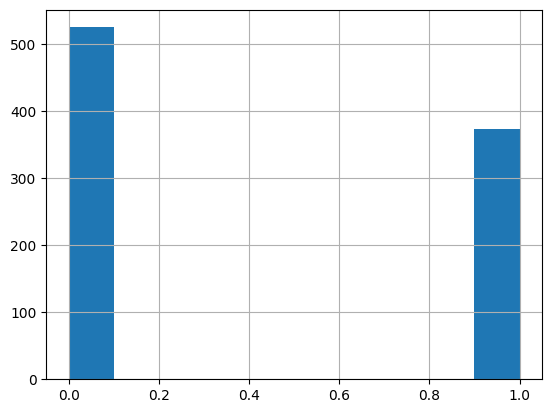

In [23]:
Xy.y.hist()

In [24]:
np.percentile(np.array(scores), [5, 10, 50, 90]) # 95% time its above 91% acuracy x

array([91.08333333, 91.66666667, 93.33333333, 95.55555556])